In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding,LSTM,Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os


 **Load your file**

In [23]:
from google.colab import files
uploaded = files.upload()

Saving 11-0.txt to 11-0.txt


**Open and pre-process the data**

In [26]:
file = open("11-0.txt", "r", encoding = "utf8")

# store file in list
lines = []
for i in file:
    lines.append(i)

# Convert list to string
data = ""
for i in lines:
  data = ' '. join(lines) 

#replace unnecessary stuff with space
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“','').replace('”','').replace("'"," ")  #new line, carriage return, unicode character --> replace by space

#remove unnecessary spaces 
data = data.split()
data = ' '.join(data)
data[:500]

'The Project Gutenberg eBook of Alice’s Adventures in Wonderland, by Lewis Carroll This eBook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org. If you are not located in the United States, you will have to check the laws of the country where you are located '

In [27]:
len(data)

160214

**Apply tokenization and some other changes**

In [28]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function
pickle.dump(tokenizer, open('token.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]

[1, 46, 41, 306, 5, 241, 387, 10, 536, 48, 952, 953, 21, 306, 33]

In [29]:
len(sequence_data)

29934

In [30]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

3302


In [31]:
sequences = []

for i in range(3, len(sequence_data)):
    words = sequence_data[i-3:i+1]
    sequences.append(words)
    
print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  29931


array([[  1,  46,  41, 306],
       [ 46,  41, 306,   5],
       [ 41, 306,   5, 241],
       [306,   5, 241, 387],
       [  5, 241, 387,  10],
       [241, 387,  10, 536],
       [387,  10, 536,  48],
       [ 10, 536,  48, 952],
       [536,  48, 952, 953],
       [ 48, 952, 953,  21]])

In [32]:
# sapareting the data input and output
X = []
y = []

for i in sequences:
    X.append(i[0:3])
    y.append(i[3])
    
X = np.array(X)
y = np.array(y)

In [33]:
print("Data: ", X[:10])
print("Response: ", y[:10])

Data:  [[  1  46  41]
 [ 46  41 306]
 [ 41 306   5]
 [306   5 241]
 [  5 241 387]
 [241 387  10]
 [387  10 536]
 [ 10 536  48]
 [536  48 952]
 [ 48 952 953]]
Response:  [306   5 241 387  10 536  48 952 953  21]


In [34]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

**Creating the model**

In [35]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=3))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 3, 10)             33020     
                                                                 
 lstm_2 (LSTM)               (None, 3, 1000)           4044000   
                                                                 
 lstm_3 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense_2 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_3 (Dense)             (None, 3302)              3305302   
                                                                 
Total params: 16,387,322
Trainable params: 16,387,322
Non-trainable params: 0
_________________________________________________________________


**Plot the model**

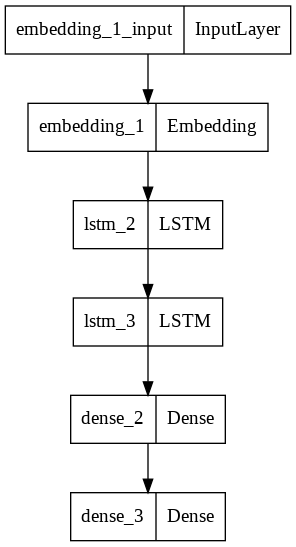

In [37]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='plot.png', show_layer_names=True)

**Train the model**


In [38]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("next_words.h5", monitor='loss', verbose=1, save_best_only=True)
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001))
model.fit(X, y, epochs=70, batch_size=64, callbacks=[checkpoint])

Epoch 1/70
465/468 [============================>.] - ETA: 0s - loss: 6.4342
Epoch 1: loss improved from inf to 6.43346, saving model to next_words.h5
468/468 [==============================] - 10s 15ms/step - loss: 6.4335
Epoch 2/70
466/468 [============================>.] - ETA: 0s - loss: 5.9483
Epoch 2: loss improved from 6.43346 to 5.94720, saving model to next_words.h5
468/468 [==============================] - 7s 14ms/step - loss: 5.9472
Epoch 3/70
465/468 [============================>.] - ETA: 0s - loss: 5.5651
Epoch 3: loss improved from 5.94720 to 5.56500, saving model to next_words.h5
468/468 [==============================] - 7s 14ms/step - loss: 5.5650
Epoch 4/70
465/468 [============================>.] - ETA: 0s - loss: 5.2388
Epoch 4: loss improved from 5.56500 to 5.23705, saving model to next_words.h5
468/468 [==============================] - 7s 14ms/step - loss: 5.2370
Epoch 5/70
466/468 [============================>.] - ETA: 0s - loss: 4.9585
Epoch 5: loss improved

**Let's predict**

In [39]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle

# Load the model and tokenizer
model = load_model('next_words.h5')
tokenizer = pickle.load(open('token.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):

  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = ""
  
  for key, value in tokenizer.word_index.items():
      if value == preds:
          predicted_word = key
          break
  
  print(predicted_word)
  return predicted_word

In [40]:
while(True):
  text = input("Enter your line: ")
  
  if text == "0":
      print("Execution completed.....")
      break
  
  else:
      try:
          text = text.split(" ")
          text = text[-3:]
          print(text)
        
          Predict_Next_Words(model, tokenizer, text)
          
      except Exception as e:
        print("Error occurred: ",e)
        continue


Enter your line: [Most recently updated: October 12, 2020]


['October', '12,', '2020]']
1/1 [==============================] - 1s 697ms/step
such
Enter your line: GUTENBERG EBOOK ALICE’S ADVENTURES
['EBOOK', 'ALICE’S', 'ADVENTURES']
1/1 [==============================] - 1s 602ms/step
in
Enter your line: and what is the use of a book
['of', 'a', 'book']
1/1 [==============================] - 0s 16ms/step
thought
Enter your line: 0
Execution completed.....
